In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# File path with folder
df = pd.read_csv("dataset/train_dataset_final1.csv")

# Preview
df.head()


,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [2]:
# Check nulls
df.isnull().sum()



Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64

In [3]:
# Check datatypes
df.dtypes



Customer_ID             int64
marriage                int64
sex                     int64
education               int64
LIMIT_BAL               int64
age                   float64
pay_0                   int64
pay_2                   int64
pay_3                   int64
pay_4                   int64
pay_5                   int64
pay_6                   int64
Bill_amt1             float64
Bill_amt2             float64
Bill_amt3             float64
Bill_amt4             float64
Bill_amt5             float64
Bill_amt6             float64
pay_amt1              float64
pay_amt2              float64
pay_amt3              float64
pay_amt4              float64
pay_amt5              float64
pay_amt6              float64
AVG_Bill_amt          float64
PAY_TO_BILL_ratio     float64
next_month_default      int64
dtype: object

In [4]:
# Check shape
df.shape


(25247, 27)

In [5]:
# Show basic info
print("Initial shape:", df.shape)

# Check nulls
print("\nMissing values:\n", df.isnull().sum())

# Fill missing values in 'age' with median (better than mean for outliers)
median_age = df['age'].median()
# df['age'].fillna(median_age, inplace=True)
df.fillna({'age': median_age}, inplace=True)


# Confirm all nulls handled
print("\nAfter filling nulls:\n", df.isnull().sum())

# Check datatypes
print("\nData types:\n", df.dtypes)

# Check shape
print("\nFinal shape:", df.shape)

Initial shape: (25247, 27)

Missing values:
 Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64

After filling nulls:
 Customer_ID           0
marriage              0
sex                   0
education             0
LIMIT_BAL             0
age                   0
pay_0                 0
pay_2                 0
pay_3                 0
p

In [6]:
# List of columns to cap
num_cols= ['LIMIT_BAL', 'age', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio'] + \
              [f'Bill_amt{i}' for i in range(1, 7)] + \
              [f'pay_amt{i}' for i in range(1, 7)]
# Function to detect outliers using IQR
def detect_outliers_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers.shape[0]

# Check outliers in selected columns
for col in num_cols:
    count = detect_outliers_IQR(df, col)
    print(f"{col} has {count} outliers")


LIMIT_BAL has 148 outliers
age has 217 outliers
AVG_Bill_amt has 2158 outliers
PAY_TO_BILL_ratio has 829 outliers
Bill_amt1 has 1986 outliers
Bill_amt2 has 1992 outliers
Bill_amt3 has 2063 outliers
Bill_amt4 has 2206 outliers
Bill_amt5 has 2279 outliers
Bill_amt6 has 2246 outliers
pay_amt1 has 2304 outliers
pay_amt2 has 2365 outliers
pay_amt3 has 2178 outliers
pay_amt4 has 2546 outliers
pay_amt5 has 2499 outliers
pay_amt6 has 2511 outliers


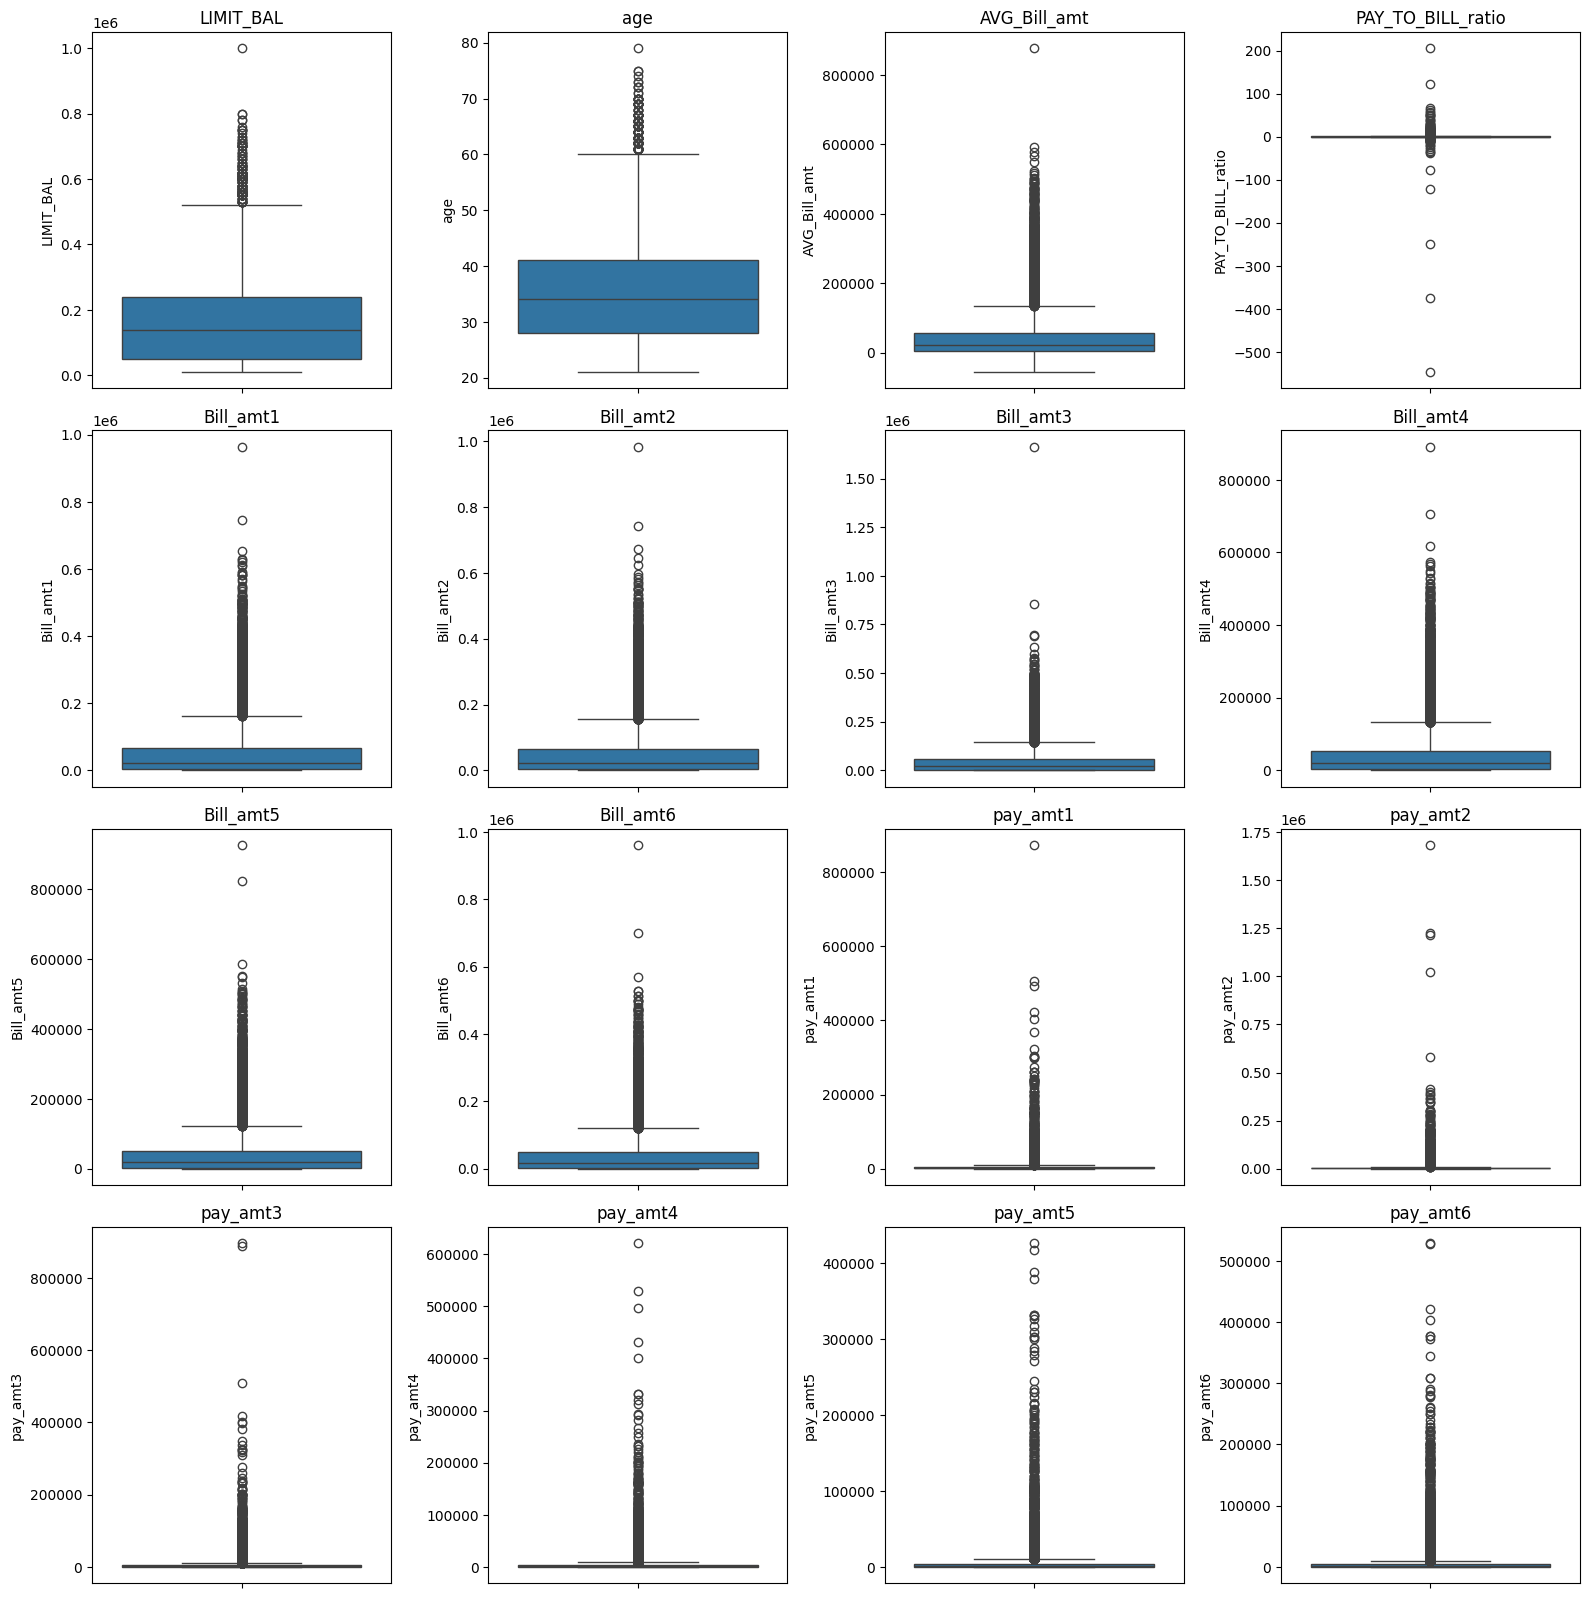

In [7]:
financial_cols = ['LIMIT_BAL', 'age', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio'] + \
                 [f'Bill_amt{i}' for i in range(1, 7)] + \
                 [f'pay_amt{i}' for i in range(1, 7)]

plt.figure(figsize=(16, 24))
for i, col in enumerate(financial_cols, 1):
    plt.subplot(6, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [8]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_limit, lower_limit,
                          np.where(df[column] > upper_limit, upper_limit, df[column]))
    
# List of columns to cap
cols_to_cap = ['LIMIT_BAL', 'age', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio'] + \
              [f'Bill_amt{i}' for i in range(1, 7)] + \
              [f'pay_amt{i}' for i in range(1, 7)]

# Apply capping
for col in cols_to_cap:
    cap_outliers_iqr(df, col)


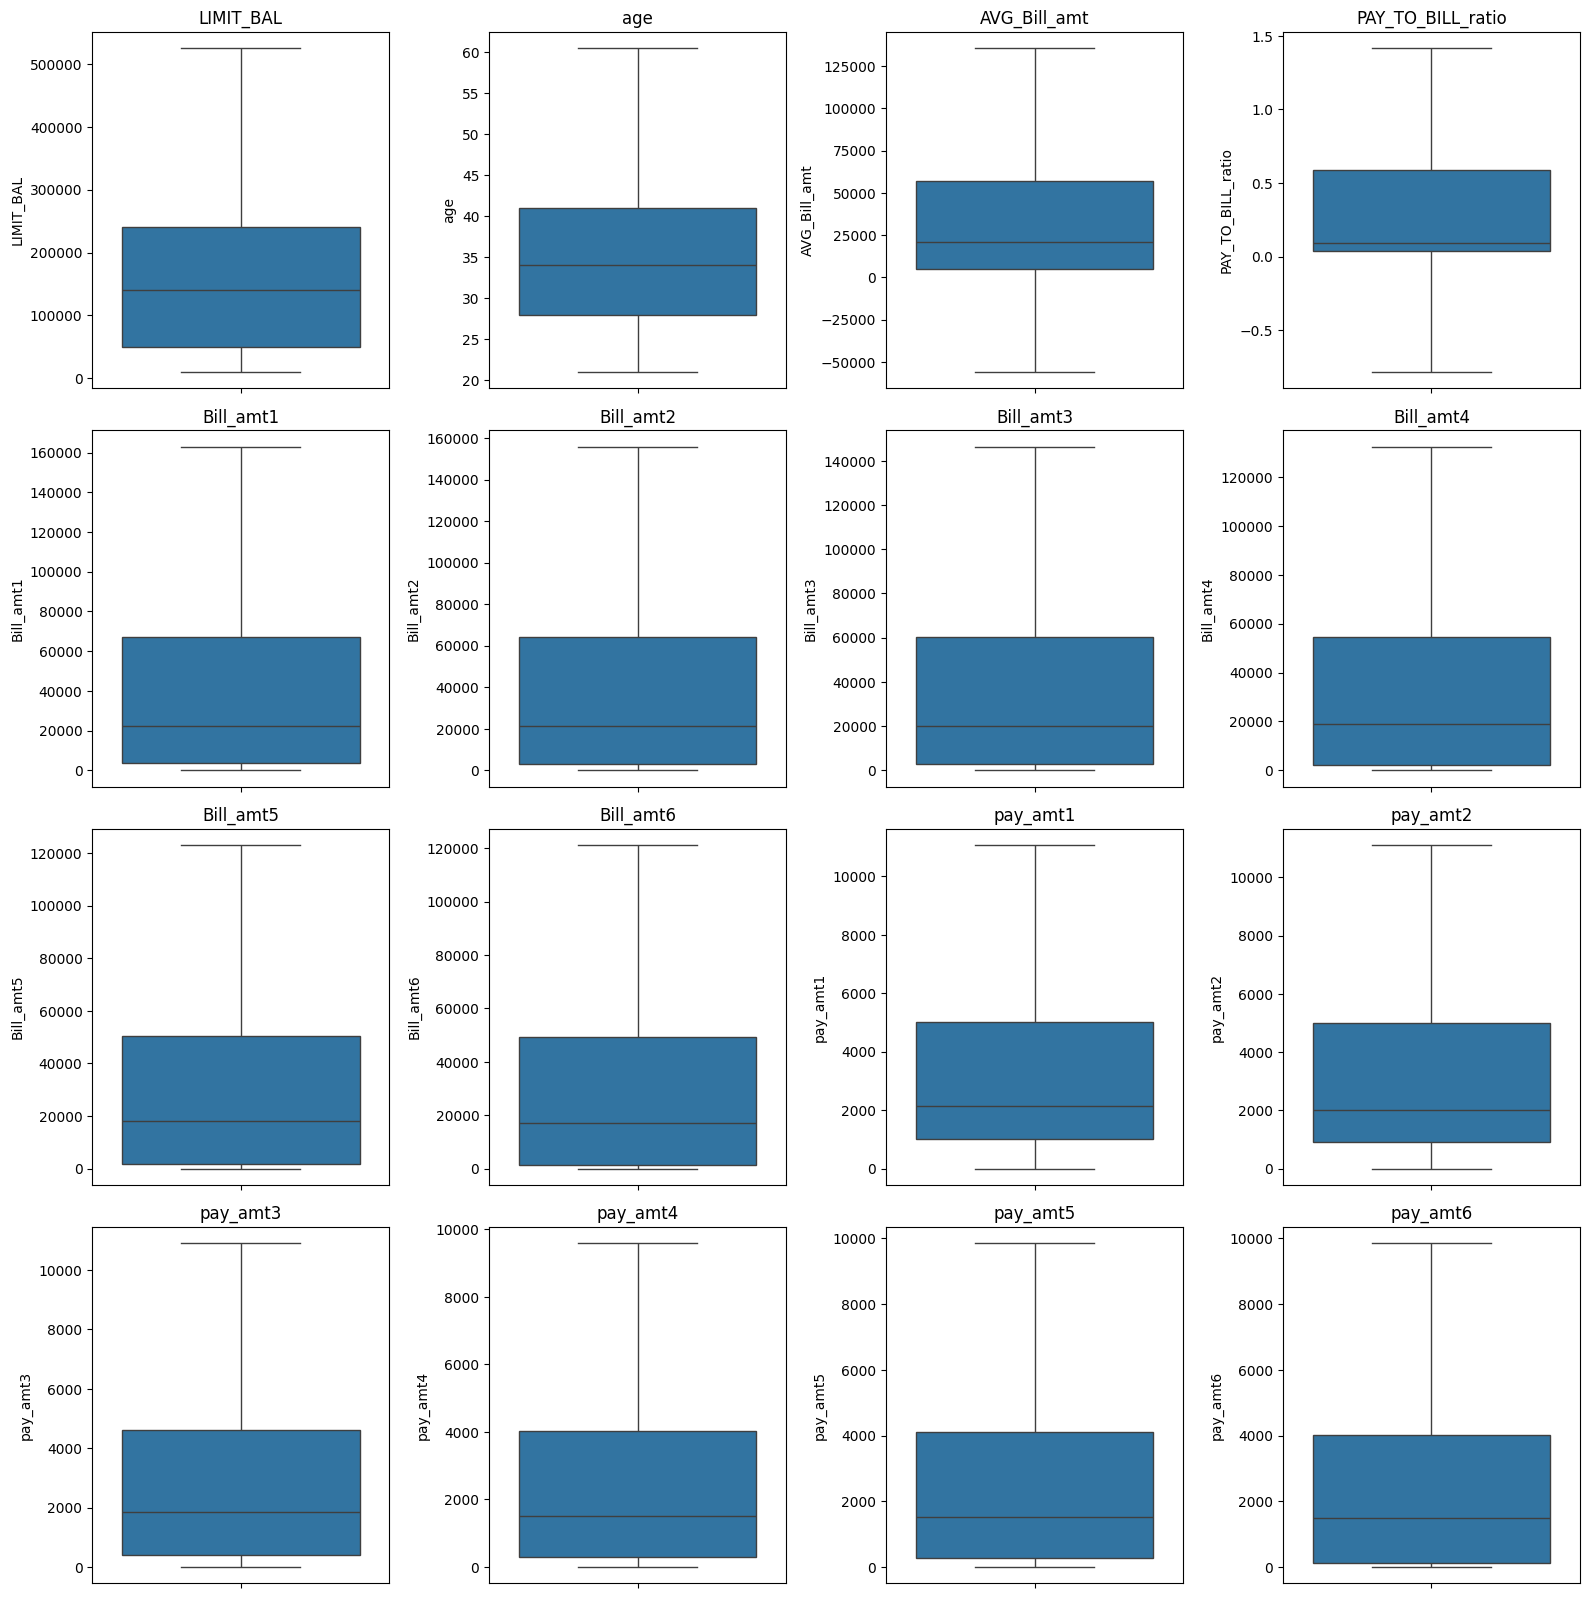

In [9]:
# Re-check boxplots after capping
plt.figure(figsize=(16, 24))
for i, col in enumerate(cols_to_cap, 1):
    plt.subplot(6, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


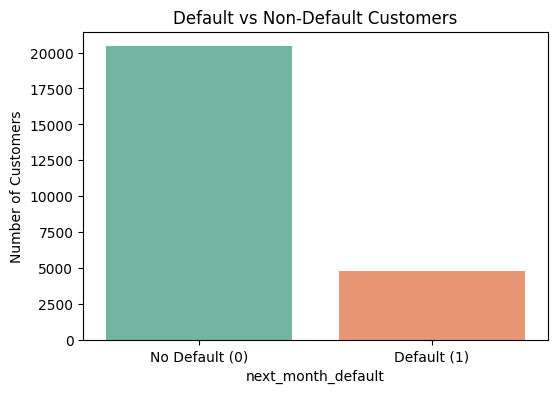

Default Rate:
 next_month_default
0    80.960114
1    19.039886
Name: proportion, dtype: float64


In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='next_month_default', data=df, hue='next_month_default', palette='Set2', legend=False)

plt.title('Default vs Non-Default Customers')
plt.xticks([0, 1], ['No Default (0)', 'Default (1)'])
plt.ylabel("Number of Customers")
plt.show()

# Percentage of defaulters
default_rate = df['next_month_default'].value_counts(normalize=True) * 100
print("Default Rate:\n", default_rate)


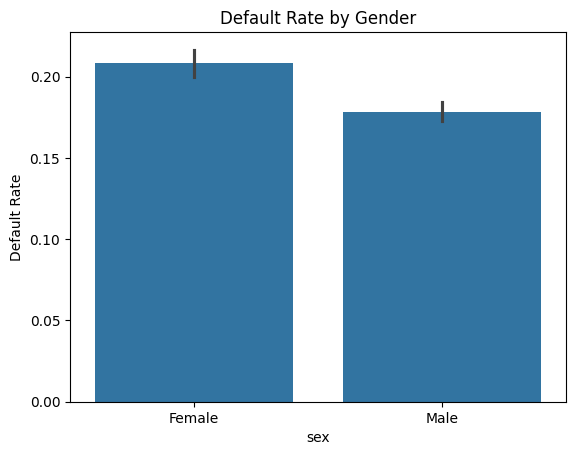

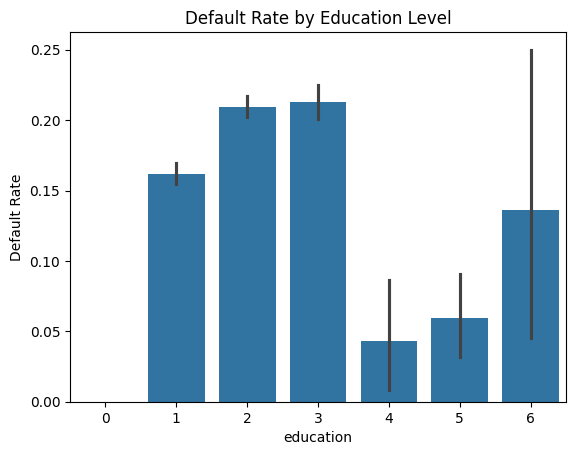

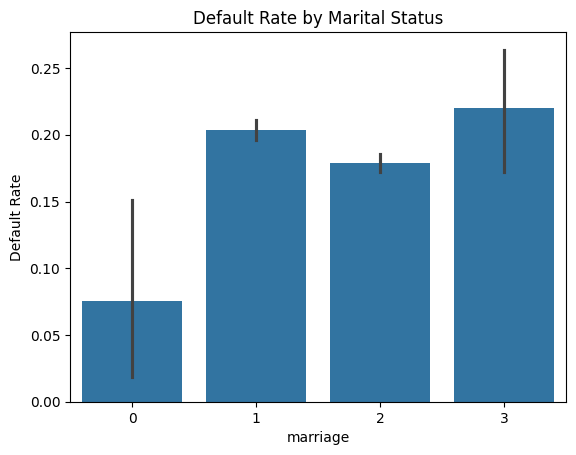

In [11]:
# Sex: 1 = Male, 0 = Female
sns.barplot(x='sex', y='next_month_default', data=df)
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Default Rate by Gender')
plt.ylabel("Default Rate")
plt.show()

# Education: 1 = Grad, 2 = Univ, 3 = High School, 4 = Others
sns.barplot(x='education', y='next_month_default', data=df)
plt.title('Default Rate by Education Level')
plt.ylabel("Default Rate")
plt.show()

# Marriage: 1 = Married, 2 = Single, 3 = Others
sns.barplot(x='marriage', y='next_month_default', data=df)
plt.title('Default Rate by Marital Status')
plt.ylabel("Default Rate")
plt.show()


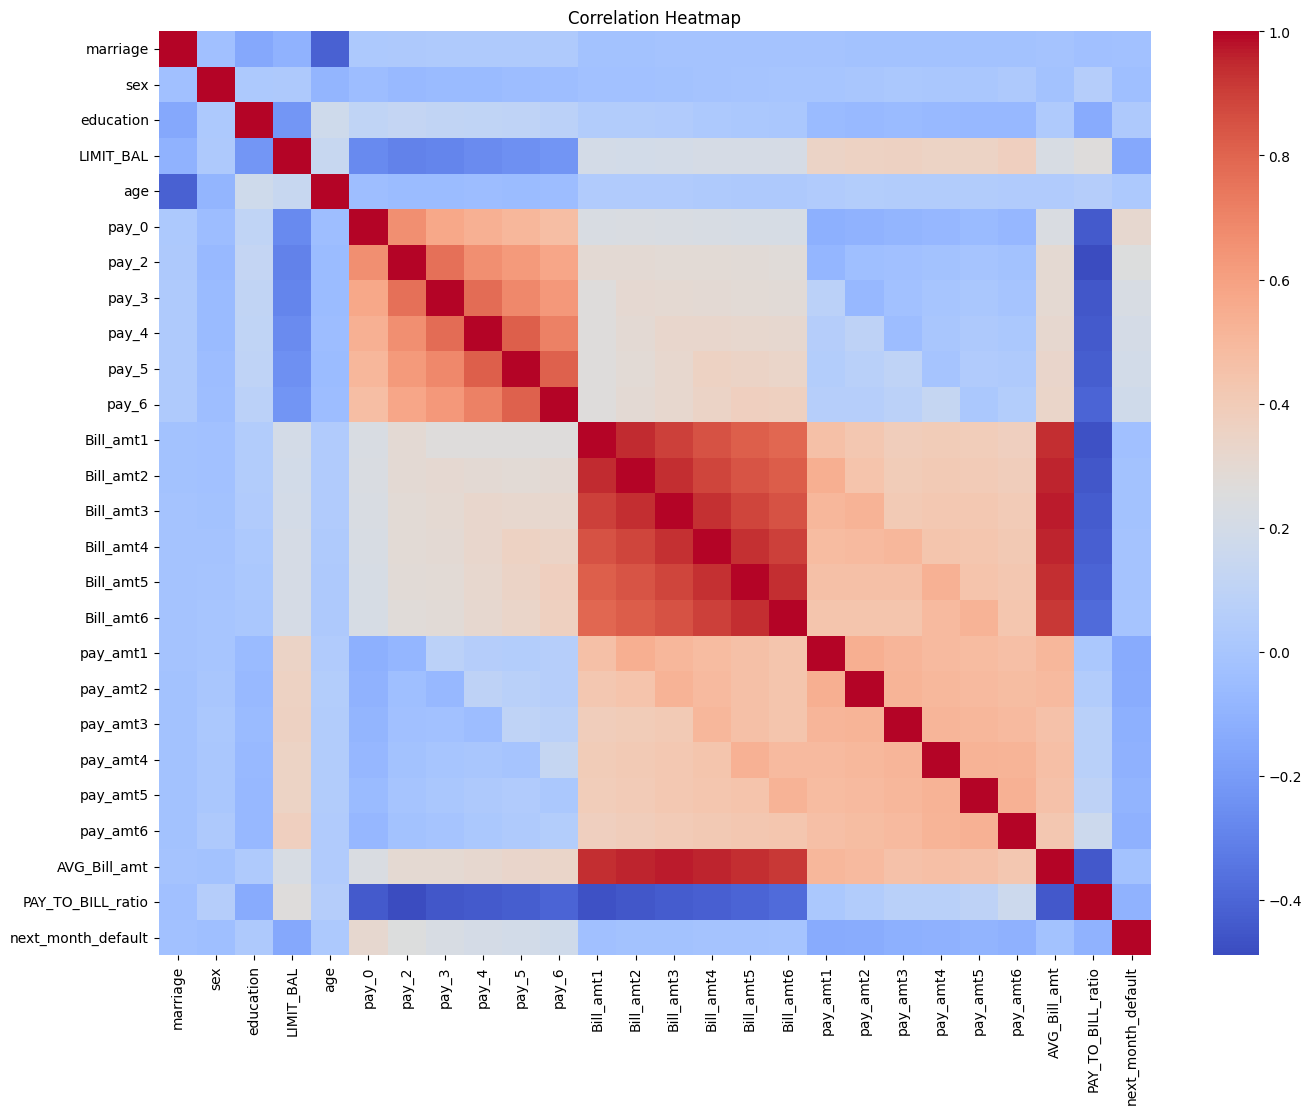

In [12]:
plt.figure(figsize=(16, 12))
corr = df.drop(columns=['Customer_ID']).corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


In [13]:
target_corr = corr['next_month_default'].sort_values(ascending=False)
print("Top correlations with next_month_default:\n", target_corr.head(10))


Top correlations with next_month_default:
 next_month_default    1.000000
pay_0                 0.312943
pay_2                 0.252125
pay_3                 0.226015
pay_4                 0.207488
pay_5                 0.196329
pay_6                 0.180387
education             0.026943
age                   0.017302
Bill_amt6            -0.007989
Name: next_month_default, dtype: float64


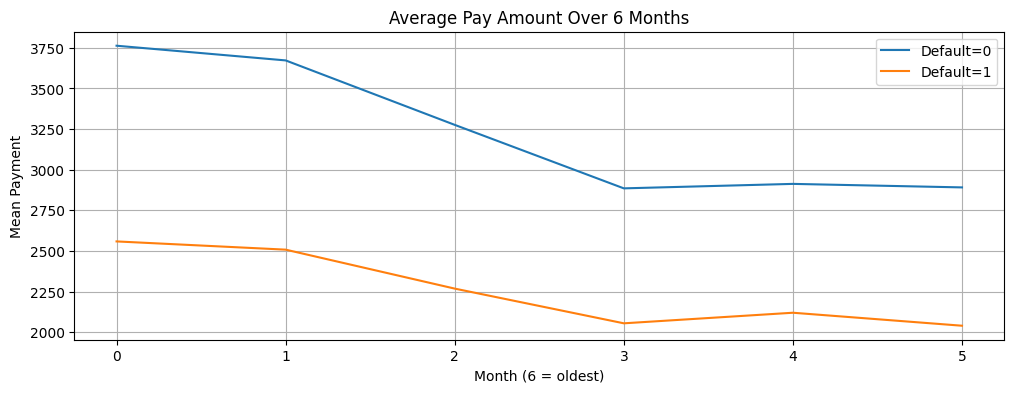

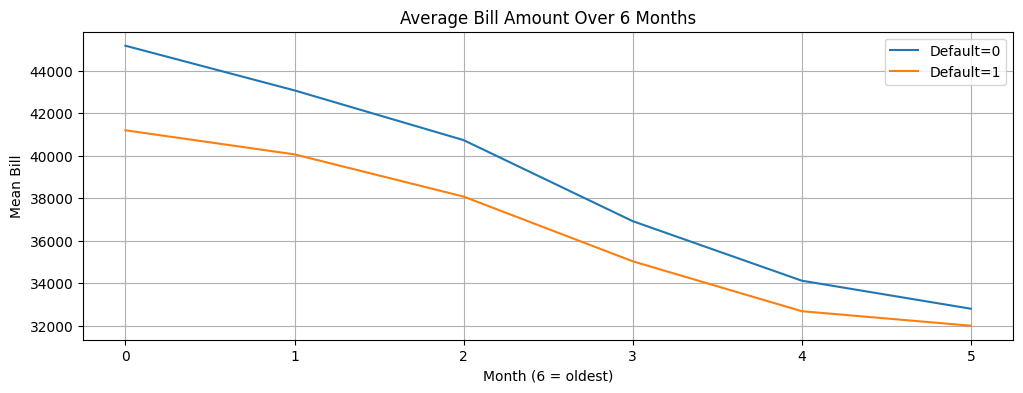

In [14]:
# Mean trend by month for default vs non-default
default_groups = df.groupby('next_month_default')

# Plot pay_amt trends
plt.figure(figsize=(12, 4))
for label, group in default_groups:
    plt.plot([group[f'pay_amt{i}'].mean() for i in range(1, 7)], label=f'Default={label}')
plt.title("Average Pay Amount Over 6 Months")
plt.xlabel("Month (6 = oldest)")
plt.ylabel("Mean Payment")
plt.legend()
plt.grid(True)
plt.show()

# Plot bill_amt trends
plt.figure(figsize=(12, 4))
for label, group in default_groups:
    plt.plot([group[f'Bill_amt{i}'].mean() for i in range(1, 7)], label=f'Default={label}')
plt.title("Average Bill Amount Over 6 Months")
plt.xlabel("Month (6 = oldest)")
plt.ylabel("Mean Bill")
plt.legend()
plt.grid(True)
plt.show()


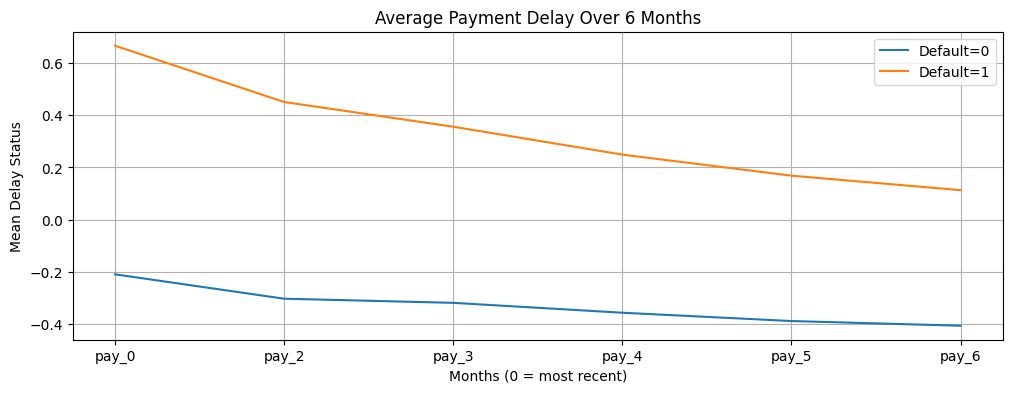

In [15]:
# Only the payment delay columns that exist in your dataset
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

plt.figure(figsize=(12, 4))
for label, group in default_groups:
    plt.plot(pay_cols, [group[col].mean() for col in pay_cols], label=f'Default={label}')
    
plt.title("Average Payment Delay Over 6 Months")
plt.xlabel("Months (0 = most recent)")
plt.ylabel("Mean Delay Status")
plt.legend()
plt.grid(True)
plt.show()


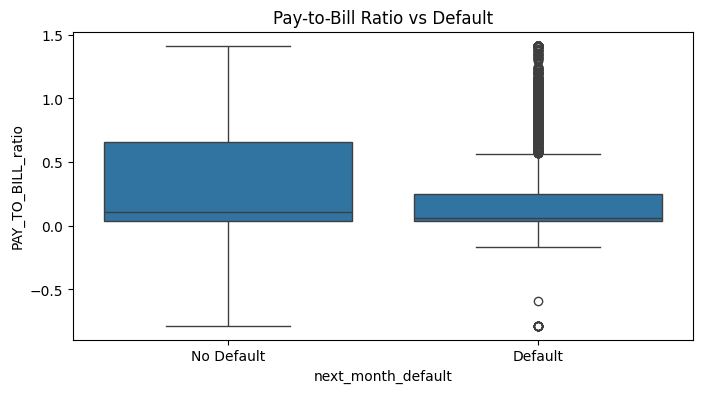

In [16]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='next_month_default', y='PAY_TO_BILL_ratio', data=df)
plt.title("Pay-to-Bill Ratio vs Default")
plt.xticks([0, 1], ['No Default', 'Default'])
plt.ylabel("PAY_TO_BILL_ratio")
plt.show()


In [17]:
print(df.groupby('next_month_default')['PAY_TO_BILL_ratio'].describe())


                      count      mean       std    min   25%   50%   75%  \
next_month_default                                                         
0                   20440.0  0.352111  0.422521 -0.785  0.04  0.11  0.66   
1                    4807.0  0.242639  0.373679 -0.785  0.04  0.06  0.25   

                      max  
next_month_default         
0                   1.415  
1                   1.415  


In [18]:
# 1. Average payment delay across last 6 months
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
df['avg_delay'] = df[pay_cols].mean(axis=1)

# 2. Recent delay (most recent month)
df['recent_delay'] = df['pay_0']

# 3. Count of delayed payments (where delay ≥ 1)
df['delay_count'] = df[pay_cols].apply(lambda row: sum(row >= 1), axis=1)

# 4. Payment consistency (std dev of pay_amt1 to pay_amt6)
pay_amt_cols = [f'pay_amt{i}' for i in range(1, 7)]
df['pay_consistency'] = df[pay_amt_cols].std(axis=1)

# 5. Bill trend (recent bill - oldest bill)
df['bill_trend'] = df['Bill_amt1'] - df['Bill_amt6']

# 6. Payment trend (optional: recent - old)
df['payment_trend'] = df['pay_amt1'] - df['pay_amt6']

# 7. Utilization ratio = avg bill / credit limit
df['utilization_ratio'] = df['AVG_Bill_amt'] / df['LIMIT_BAL']
df['utilization_ratio'] = df['utilization_ratio'].replace([np.inf, -np.inf], 0)
  # Handle division by zero


C:\Users\m5cd2\AppData\Local\Temp\ipykernel_1184\1598225962.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='next_month_default', y='delay_count', data=df, palette='Set2')


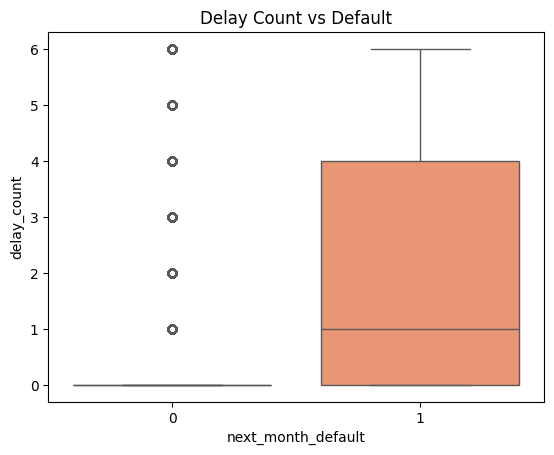

C:\Users\m5cd2\AppData\Local\Temp\ipykernel_1184\1598225962.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='next_month_default', y='PAY_TO_BILL_ratio', data=df, palette='Set2')


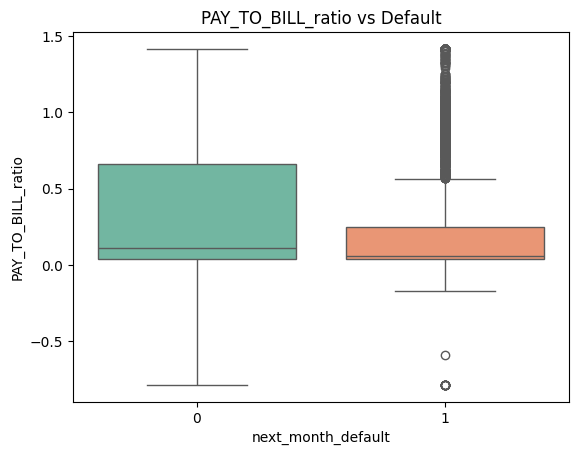

C:\Users\m5cd2\AppData\Local\Temp\ipykernel_1184\1598225962.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='next_month_default', y='utilization_ratio', data=df, palette='Set2')


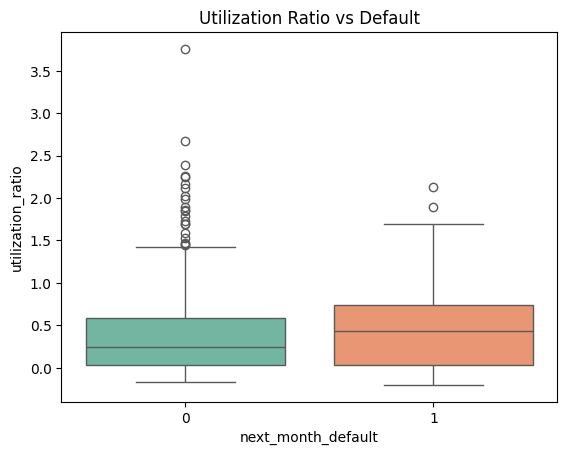

In [19]:
# Insight 1: Delayed payments vs default
sns.boxplot(x='next_month_default', y='delay_count', data=df, palette='Set2')
plt.title('Delay Count vs Default')
plt.show()

# Insight 2: Pay to bill ratio
sns.boxplot(x='next_month_default', y='PAY_TO_BILL_ratio', data=df, palette='Set2')
plt.title('PAY_TO_BILL_ratio vs Default')
plt.show()

# Insight 3: Utilization ratio
sns.boxplot(x='next_month_default', y='utilization_ratio', data=df, palette='Set2')
plt.title('Utilization Ratio vs Default')
plt.show()


In [20]:
df[['avg_delay', 'recent_delay', 'delay_count', 'pay_consistency',
    'bill_trend', 'payment_trend', 'utilization_ratio']].describe()


,avg_delay,recent_delay,delay_count,pay_consistency,bill_trend,payment_trend,utilization_ratio
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,-0.204070,-0.042857,0.785915,1834.196045,11780.459531,804.355514,0.351406
std,0.962469,1.099315,1.507302,1480.934881,31331.438426,3449.405351,0.332596
min,-2.000000,-2.000000,0.000000,0.000000,-121250.422500,-9851.845000,-0.200154
25%,-0.833333,-1.000000,0.000000,618.014617,-2298.900000,-186.415000,0.029816
50%,0.000000,0.000000,0.000000,1321.606854,1557.270000,611.930000,0.271107
75%,0.000000,0.000000,1.000000,3093.251628,23879.980000,1999.675000,0.626680
max,5.500000,8.000000,6.000000,6043.117657,163031.515000,11077.897500,3.759125


In [21]:
from sklearn.preprocessing import StandardScaler

# Features you want to scale (don't include categorical like sex, marriage, etc.)
scale_cols = ['LIMIT_BAL', 'AVG_Bill_amt', 'utilization_ratio',
              'bill_trend', 'payment_trend', 'pay_consistency',
              'avg_delay', 'recent_delay', 'delay_count']

# Create a scaler instance
scaler = StandardScaler()

# Fit and transform the columns
df[scale_cols] = scaler.fit_transform(df[scale_cols])


In [22]:
df[scale_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,25247.0,-8.365700e-17,1.00002,-1.232619,-0.920129,-0.217027,0.564197,2.790687
AVG_Bill_amt,25247.0,3.841608e-17,1.00002,-2.203370,-0.786602,-0.408712,0.429547,2.253769
utilization_ratio,25247.0,2.271193e-16,1.00002,-1.658379,-0.966926,-0.241435,0.827671,10.246014
bill_trend,25247.0,-2.758078e-17,1.00002,-4.246007,-0.449377,-0.326298,0.386186,4.827549
payment_trend,25247.0,2.856580e-17,1.00002,-3.089347,-0.287235,-0.055786,0.346536,2.978411
pay_consistency,25247.0,-4.914585e-17,1.00002,-1.238564,-0.821242,-0.346132,0.850193,2.842127
avg_delay,25247.0,5.910167e-18,1.00002,-1.865997,-0.653813,0.212032,0.212032,5.926612
recent_delay,25247.0,-7.035913e-17,1.00002,-1.780365,-0.870690,0.038986,0.038986,7.316388
delay_count,25247.0,5.094001e-17,1.00002,-0.521416,-0.521416,-0.521416,0.142035,3.459286


In [23]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

# Drop ID and Target to create features (X) and labels (y)
X = df.drop(columns=['Customer_ID', 'next_month_default'])
y = df['next_month_default']

# 1. Split the data (stratify ensures same class ratio in both sets)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Before SMOTE:")
print(y_train.value_counts())

# 2. Apply SMOTE on training set only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE:")
print(y_train_resampled.value_counts())

# Optional: check shape
print("\nTraining set shape after SMOTE:", X_train_resampled.shape)
print("Testing set shape:", X_test.shape)


Before SMOTE:
next_month_default
0    16352
1     3845
Name: count, dtype: int64

After SMOTE:
next_month_default
0    16352
1    16352
Name: count, dtype: int64

Training set shape after SMOTE: (32704, 32)
Testing set shape: (5050, 32)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier  # Install with `pip install xgboost` if needed


In [26]:
#  Logistic Regression
logreg = LogisticRegression(
    max_iter=5000,
    solver='saga',        # better for large datasets and sparse gradients
    penalty='l2',
    random_state=42
)


logreg.fit(X_train_resampled, y_train_resampled)

# Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_resampled, y_train_resampled)

#  XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

xgb.fit(X_train_resampled, y_train_resampled)


C:\Users\m5cd2\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [27]:
print("All models trained successfully!")


All models trained successfully!


In [28]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import fbeta_score





🔍 Model: Logistic Regression


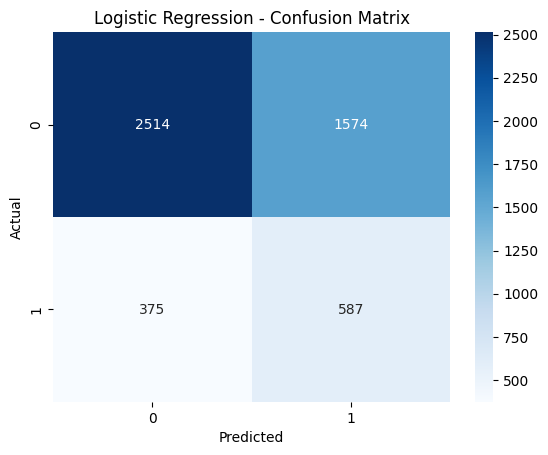

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.61      0.72      4088
           1       0.27      0.61      0.38       962

    accuracy                           0.61      5050
   macro avg       0.57      0.61      0.55      5050
weighted avg       0.76      0.61      0.65      5050

F1 Score: 0.3759
 F2 Score: 0.4884
ROC-AUC Score: 0.6463

🔍 Model: Decision Tree


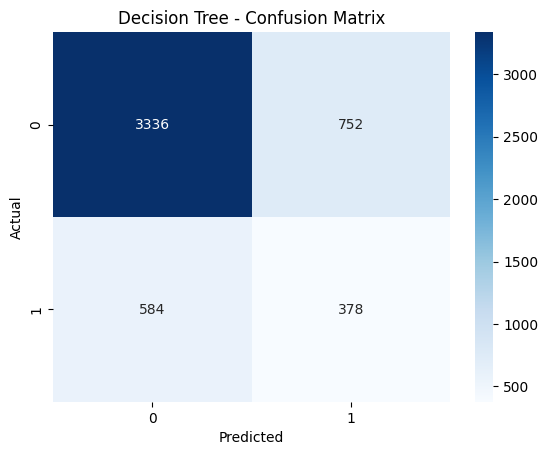

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      4088
           1       0.33      0.39      0.36       962

    accuracy                           0.74      5050
   macro avg       0.59      0.60      0.60      5050
weighted avg       0.75      0.74      0.74      5050

F1 Score: 0.3614
 F2 Score: 0.3797
ROC-AUC Score: 0.6045

🔍 Model: XGBoost


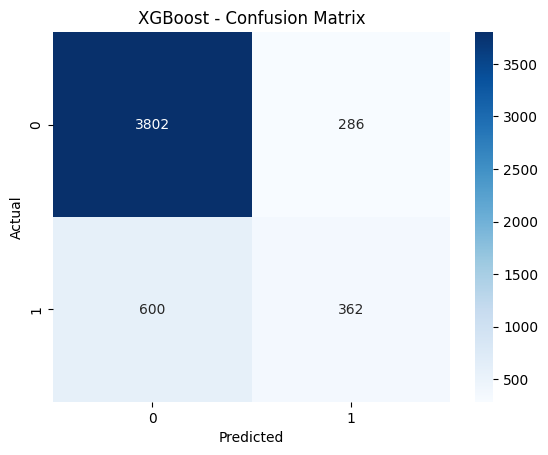

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      4088
           1       0.56      0.38      0.45       962

    accuracy                           0.82      5050
   macro avg       0.71      0.65      0.67      5050
weighted avg       0.81      0.82      0.81      5050

F1 Score: 0.4497
 F2 Score: 0.4026
ROC-AUC Score: 0.7507


In [29]:

models = {
    'Logistic Regression': logreg,
    'Decision Tree': tree,
    'XGBoost': xgb
}

for name, model in models.items():
    print(f"\n Model: {name}")
    
    # Predict class labels and probabilities
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Classification Report
    print(" Classification Report:")
    print(classification_report(y_test, y_pred))

    # F1 Score
    f1 = f1_score(y_test, y_pred)
    print(f"F1 Score: {f1:.4f}")
    f2 = fbeta_score(y_test, y_pred, beta=2)
    print(f" F2 Score: {f2:.4f}")

    # ROC-AUC Score
    auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score: {auc:.4f}")



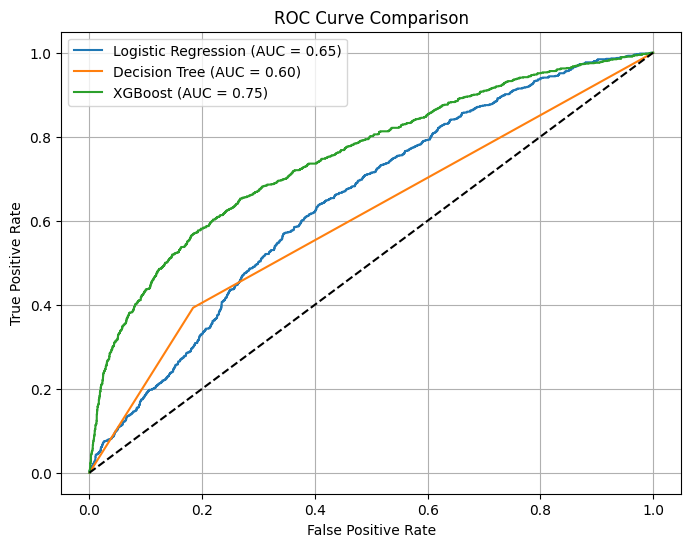

In [30]:
plt.figure(figsize=(8, 6))

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

In [31]:
from sklearn.tree import DecisionTreeClassifier

# Limit tree depth to avoid overfitting
tree = DecisionTreeClassifier(
    max_depth=5,         # Try 5 to 10
    min_samples_split=50,
    min_samples_leaf=20,
    class_weight='balanced',  # optional
    random_state=42
)

tree.fit(X_train_resampled, y_train_resampled)


DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=20, min_samples_split=50,
                       random_state=42)

In [32]:
from sklearn.metrics import classification_report, roc_auc_score, f1_score , fbeta_score

y_pred = tree.predict(X_test)
y_proba = tree.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
print(" F2-Score:", fbeta_score(y_test, y_pred, beta=2))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      4088
           1       0.45      0.60      0.52       962

    accuracy                           0.79      5050
   macro avg       0.68      0.71      0.69      5050
weighted avg       0.81      0.79      0.80      5050

F1-Score: 0.5152877697841727
ROC-AUC Score: 0.7618730191504164
 F2-Score: 0.5606653620352251


In [33]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['gini', 'entropy']
}

tree_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=params,
    scoring='f1',
    n_iter=10,
    cv=3,
    verbose=1,
    n_jobs=-1
)

tree_search.fit(X_train_resampled, y_train_resampled)

best_tree = tree_search.best_estimator_
print("Best Params:", tree_search.best_params_)

# Evaluate
y_pred = best_tree.predict(X_test)
y_proba = best_tree.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))
print(" F2-Score:", fbeta_score(y_test, y_pred, beta=2))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params: {'min_samples_split': 50, 'min_samples_leaf': 20, 'max_depth': 5, 'criterion': 'gini'}
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      4088
           1       0.45      0.60      0.52       962

    accuracy                           0.79      5050
   macro avg       0.68      0.71      0.69      5050
weighted avg       0.81      0.79      0.80      5050

F1-Score: 0.5152877697841727
AUC: 0.7618730191504164
 F2-Score: 0.5606653620352251


In [34]:
print("Min PAY_TO_BILL_ratio:", df['PAY_TO_BILL_ratio'].min())
print("Min utilization_ratio:", df['utilization_ratio'].min())
print("Any NaNs?", df[['PAY_TO_BILL_ratio', 'utilization_ratio']].isnull().sum())


Min PAY_TO_BILL_ratio: -0.7849999999999999
Min utilization_ratio: -1.6583790299154135
Any NaNs? PAY_TO_BILL_ratio    0
utilization_ratio    0
dtype: int64


In [35]:
# # Fix skewed values safely

df['LOG_AVG_Bill_amt'] = np.log1p(df['AVG_Bill_amt'].clip(lower=1e-6))
df['LOG_LIMIT_BAL'] = np.log1p(df['LIMIT_BAL'].clip(lower=1e-6))
df['LOG_PAY_TO_BILL'] = np.log1p(df['PAY_TO_BILL_ratio'].clip(lower=-0.99))
df['LOG_UTIL_RATIO'] = np.log1p(df['utilization_ratio'].clip(lower=1e-6))



In [36]:
selected_features = [
    'delay_count',
    'LOG_UTIL_RATIO',
    'LOG_AVG_Bill_amt',
    'LOG_LIMIT_BAL',
    'LOG_PAY_TO_BILL',
    'education', 'marriage', 'sex'
]


In [37]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X = df[selected_features]
y = df['next_month_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


In [38]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, roc_auc_score,fbeta_score

logreg = LogisticRegression(
    solver='saga',
    penalty='l2',
    C=1.0,
    max_iter=5000,
    class_weight='balanced',
    random_state=42
)

logreg.fit(X_train_scaled, y_train_resampled)

# Predict with threshold tuning
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]
# y_pred = (y_proba >= 0.3).astype(int)

# # Evaluate
# print(classification_report(y_test, y_pred))
# print("F1-Score:", f1_score(y_test, y_pred))
# print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


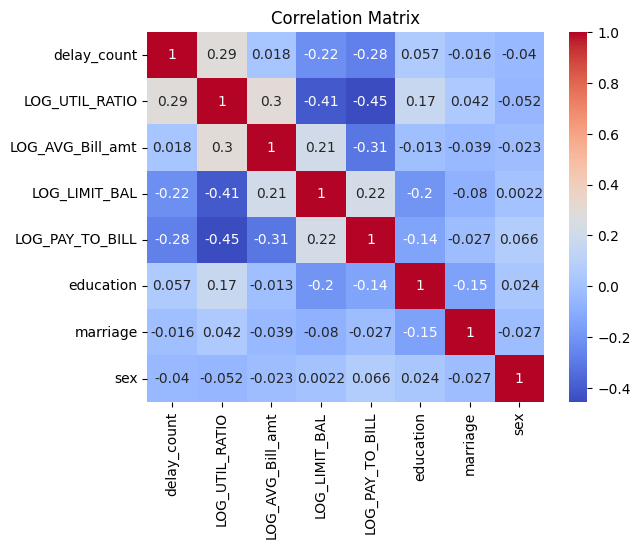

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pd.DataFrame(X_train_resampled, columns=selected_features).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [40]:

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score,fbeta_score, roc_auc_score, confusion_matrix

y_pred = (y_proba >= 0.5).astype(int)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
print(" F2-Score:", fbeta_score(y_test, y_pred, beta=2))



              precision    recall  f1-score   support

           0       0.89      0.83      0.86      4088
           1       0.44      0.55      0.49       962

    accuracy                           0.78      5050
   macro avg       0.66      0.69      0.67      5050
weighted avg       0.80      0.78      0.79      5050

Accuracy: 0.7794059405940594
F1-Score: 0.4889908256880734
ROC-AUC Score: 0.743137970877697
 F2-Score: 0.5260560600078957


In [41]:

import numpy as np
from sklearn.metrics import f1_score

thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = []

for t in thresholds:
    preds = (y_proba >= t).astype(int)
    f1_scores.append(f1_score(y_test, preds))

best_idx = np.argmax(f1_scores)
best_threshold_f1 = thresholds[best_idx]

print(f"Best Threshold_f1: {best_threshold_f1:.2f}")
print(f"Best F1 Score: {f1_scores[best_idx]:.4f}")



Best Threshold_f1: 0.49
Best F1 Score: 0.4899


In [42]:
import numpy as np
from sklearn.metrics import fbeta_score

thresholds = np.arange(0.1, 0.9, 0.01)
f2_scores = []

for t in thresholds:
    preds = (y_proba >= t).astype(int)
    f2_scores.append(fbeta_score(y_test, preds, beta=2))

best_idx = np.argmax(f2_scores)
best_threshold_f2 = thresholds[best_idx]

print(f" Best Threshold (F2): {best_threshold_f2:.2f}")
print(f"Best F2 Score: {f2_scores[best_idx]:.4f}")


 Best Threshold (F2): 0.39
Best F2 Score: 0.5762


In [43]:


from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score

# Use threshold based on F2 score
y_pred = (y_proba >= best_threshold_f2).astype(int)

print(" Classification Report (F2 Threshold):")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))
print(" F1-Score:", f1_score(y_test, y_pred))
print(" F2-Score:", fbeta_score(y_test, y_pred, beta=2))
print(" ROC-AUC Score:", roc_auc_score(y_test, y_proba))


 Classification Report (F2 Threshold):
              precision    recall  f1-score   support

           0       0.91      0.59      0.71      4088
           1       0.30      0.75      0.43       962

    accuracy                           0.62      5050
   macro avg       0.60      0.67      0.57      5050
weighted avg       0.79      0.62      0.66      5050

Accuracy: 0.6194059405940594
 F1-Score: 0.4283164782867341
 F2-Score: 0.5761843790012804
 ROC-AUC Score: 0.743137970877697


In [44]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score,fbeta_score, roc_auc_score, confusion_matrix
y_pred = (y_proba >= best_threshold_f1).astype(int)
print(" Classification Report (F1 Threshold):")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print(" F2-Score:", fbeta_score(y_test, y_pred, beta=2))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

 Classification Report (F1 Threshold):
              precision    recall  f1-score   support

           0       0.89      0.82      0.86      4088
           1       0.43      0.57      0.49       962

    accuracy                           0.77      5050
   macro avg       0.66      0.70      0.67      5050
weighted avg       0.80      0.77      0.79      5050

Accuracy: 0.7748514851485149
F1-Score: 0.4899057873485868
 F2-Score: 0.533724340175953
ROC-AUC Score: 0.743137970877697



 Best Threshold_f1: 0.52
 Best F1 Score: 0.5046

 Final Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      4088
           1       0.45      0.57      0.50       962

    accuracy                           0.79      5050
   macro avg       0.67      0.70      0.68      5050
weighted avg       0.81      0.79      0.80      5050

 Accuracy: 0.7865346534653466
 F1-Score: 0.5045955882352942
 F2-Score: 0.5422757803239826
 ROC-AUC Score: 0.7472878380412628


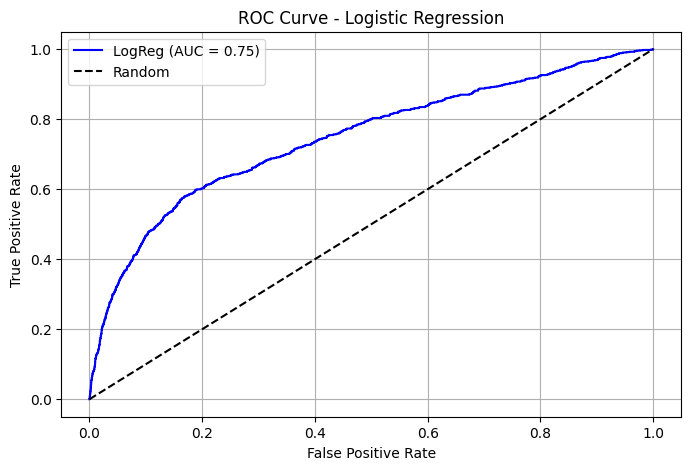

In [45]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, accuracy_score, f1_score,
    roc_auc_score, roc_curve,fbeta_score
)
import matplotlib.pyplot as plt

#  Step 1: Log transform skewed features (handle negatives/zeros safely)
df['LOG_AVG_Bill_amt'] = np.log1p(df['AVG_Bill_amt'].clip(lower=1e-6))
df['LOG_LIMIT_BAL'] = np.log1p(df['LIMIT_BAL'].clip(lower=1e-6))
df['LOG_PAY_TO_BILL'] = np.log1p(df['PAY_TO_BILL_ratio'].clip(lower=-0.99))
df['LOG_UTIL_RATIO'] = np.log1p(df['utilization_ratio'].clip(lower=1e-6))

# Optional: fill any NaNs from invalid log transform
df[['LOG_AVG_Bill_amt', 'LOG_LIMIT_BAL', 'LOG_PAY_TO_BILL', 'LOG_UTIL_RATIO']] = \
    df[['LOG_AVG_Bill_amt', 'LOG_LIMIT_BAL', 'LOG_PAY_TO_BILL', 'LOG_UTIL_RATIO']].fillna(0)

#  Step 2: Feature Selection
selected_features = [
    'delay_count', 'recent_delay', 'pay_consistency',
    'LOG_UTIL_RATIO', 'LOG_AVG_Bill_amt',
    'LOG_LIMIT_BAL', 'LOG_PAY_TO_BILL',
    'education', 'marriage', 'sex'
]

X = df[selected_features]
y = df['next_month_default']

#  Step 3: Train-Test Split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Step 4: Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#  Step 5: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

#  Step 6: Train Logistic Regression
logreg = LogisticRegression(
    solver='saga',
    penalty='l2',
    C=1.0,
    max_iter=5000,
    class_weight='balanced',
    random_state=42
)
logreg.fit(X_train_scaled, y_train_resampled)

#  Step 7: Predict probabilities
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

#  Step 8: Threshold Optimization
thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = [f1_score(y_test, (y_proba >= t).astype(int)) for t in thresholds]

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print(f"\n Best Threshold_f1: {best_threshold:.2f}")
print(f" Best F1 Score: {f1_scores[best_idx]:.4f}")


# Step 9: Final Prediction with best threshold
y_pred = (y_proba >= best_threshold).astype(int)

#  Step 10: Evaluation
print("\n Final Classification Report:")
print(classification_report(y_test, y_pred))
print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" F1-Score:", f1_score(y_test, y_pred))
print(" F2-Score:", fbeta_score(y_test, y_pred, beta=2))
print(" ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Step 11: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"LogReg (AUC = {roc_auc_score(y_test, y_proba):.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


 Best Threshold (F2): 0.37
Best F2 Score: 0.5782

 Final Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.50      0.65      4088
           1       0.27      0.80      0.41       962

    accuracy                           0.56      5050
   macro avg       0.59      0.65      0.53      5050
weighted avg       0.79      0.56      0.60      5050

 Accuracy: 0.5592079207920793
 F1-Score: 0.4086078639744952
 F2-Score: 0.5781954887218045
 ROC-AUC Score: 0.7472878380412628


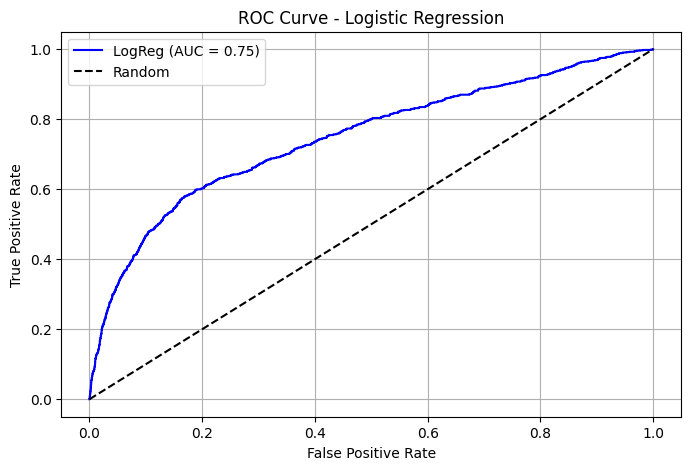

In [46]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, accuracy_score, f1_score,
    roc_auc_score, roc_curve,fbeta_score
)
import matplotlib.pyplot as plt

#  Step 1: Log transform skewed features (handle negatives/zeros safely)
df['LOG_AVG_Bill_amt'] = np.log1p(df['AVG_Bill_amt'].clip(lower=1e-6))
df['LOG_LIMIT_BAL'] = np.log1p(df['LIMIT_BAL'].clip(lower=1e-6))
df['LOG_PAY_TO_BILL'] = np.log1p(df['PAY_TO_BILL_ratio'].clip(lower=-0.99))
df['LOG_UTIL_RATIO'] = np.log1p(df['utilization_ratio'].clip(lower=1e-6))

# Optional: fill any NaNs from invalid log transform
df[['LOG_AVG_Bill_amt', 'LOG_LIMIT_BAL', 'LOG_PAY_TO_BILL', 'LOG_UTIL_RATIO']] = \
    df[['LOG_AVG_Bill_amt', 'LOG_LIMIT_BAL', 'LOG_PAY_TO_BILL', 'LOG_UTIL_RATIO']].fillna(0)

#  Step 2: Feature Selection
selected_features = [
    'delay_count', 'recent_delay', 'pay_consistency',
    'LOG_UTIL_RATIO', 'LOG_AVG_Bill_amt',
    'LOG_LIMIT_BAL', 'LOG_PAY_TO_BILL',
    'education', 'marriage', 'sex'
]

X = df[selected_features]
y = df['next_month_default']

#  Step 3: Train-Test Split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Step 4: Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#  Step 5: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

#  Step 6: Train Logistic Regression
logreg = LogisticRegression(
    solver='saga',
    penalty='l2',
    C=1.0,
    max_iter=5000,
    class_weight='balanced',
    random_state=42
)
logreg.fit(X_train_scaled, y_train_resampled)

#  Step 7: Predict probabilities
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

#  Step 8: Threshold Optimization

thresholds = np.arange(0.1, 0.9, 0.01)
f2_scores = []

for t in thresholds:
    preds = (y_proba >= t).astype(int)
    f2_scores.append(fbeta_score(y_test, preds, beta=2))

best_idx = np.argmax(f2_scores)
best_threshold_f2 = thresholds[best_idx]

print(f" Best Threshold (F2): {best_threshold_f2:.2f}")
print(f"Best F2 Score: {f2_scores[best_idx]:.4f}")



# Step 9: Final Prediction with best threshold
y_pred = (y_proba >= best_threshold_f2).astype(int)

#  Step 10: Evaluation
print("\n Final Classification Report:")
print(classification_report(y_test, y_pred))
print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" F1-Score:", f1_score(y_test, y_pred))
print(" F2-Score:", fbeta_score(y_test, y_pred, beta=2))
print(" ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Step 11: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"LogReg (AUC = {roc_auc_score(y_test, y_proba):.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\m5cd2\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:18:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Dropped Low-Impact Features: []
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\m5cd2\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:19:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Best Params: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 1.0}

 Best Threshold(F1): 0.40
 Best F1 Score: 0.5133

 Final Classification Report (XGBoost Improved):
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      4088
           1       0.46      0.58      0.51       962

    accuracy                           0.79      5050
   macro avg       0.68      0.71      0.69      5050
weighted avg       0.81      0.79      0.80      5050

 Accuracy: 0.7900990099009901
 F1-Score: 0.5133149678604224
 F2-Score: 0.5519352290679305
 ROC-AUC Score: 0.7529112640414011


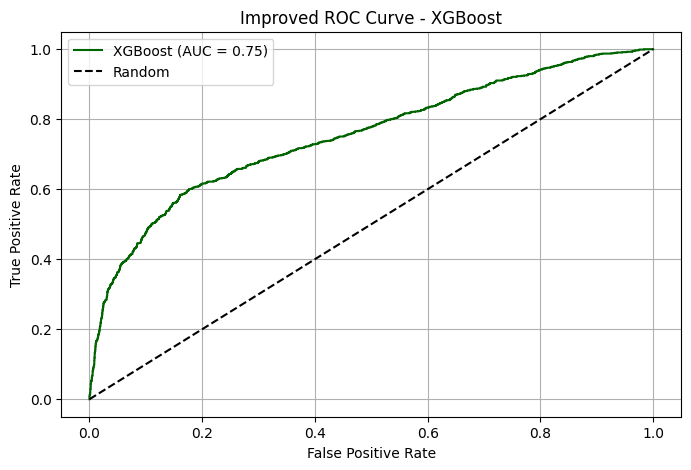

In [47]:
# Imports
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, roc_auc_score, accuracy_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Step 1: Log Transform Skewed Features
df['LOG_AVG_Bill_amt'] = np.log1p(df['AVG_Bill_amt'].clip(lower=1e-6))
df['LOG_LIMIT_BAL'] = np.log1p(df['LIMIT_BAL'].clip(lower=1e-6))
df['LOG_PAY_TO_BILL'] = np.log1p(df['PAY_TO_BILL_ratio'].clip(lower=-0.99))
df['LOG_UTIL_RATIO'] = np.log1p(df['utilization_ratio'].clip(lower=1e-6))

#  Step 2: Create Interaction Features
df['delay_util'] = df['delay_count'] * df['LOG_UTIL_RATIO']
df['recent_util'] = df['recent_delay'] * df['LOG_UTIL_RATIO']
df['pay_bill_ratio'] = df['pay_consistency'] / (df['LOG_PAY_TO_BILL'] + 1)

#  Fill any NaNs
df.fillna(0, inplace=True)

# Step 3: Final Feature Set
features = [
    'delay_count', 'recent_delay', 'pay_consistency',
    'LOG_UTIL_RATIO', 'LOG_AVG_Bill_amt', 'LOG_LIMIT_BAL', 'LOG_PAY_TO_BILL',
    'education', 'marriage', 'sex',
    'delay_util', 'recent_util', 'pay_bill_ratio'
]

X = df[features]
y = df['next_month_default']

#  Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Step 5: SMOTE on Train Set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#  Step 6: Calculate scale_pos_weight
neg, pos = np.bincount(y_train_resampled)
scale_pos_weight = neg / pos

#  Step 7: Initial XGBoost Model
xgb_initial = XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    random_state=42
)

xgb_initial.fit(X_train_resampled, y_train_resampled)

#  Step 8: Drop Low Importance Features
importances = pd.Series(xgb_initial.feature_importances_, index=X_train.columns)
low_impact = importances[importances < 0.01].index.tolist()
print(" Dropped Low-Impact Features:", low_impact)

# Remove low-impact features
X_train_reduced = X_train_resampled.drop(columns=low_impact)
X_test_reduced = X_test.drop(columns=low_impact)

#  Step 9: Tune Final Model with RandomizedSearchCV
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

search = RandomizedSearchCV(
    estimator=XGBClassifier(
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False,
        random_state=42
    ),
    param_distributions=params,
    n_iter=10,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

search.fit(X_train_reduced, y_train_resampled)
xgb_best = search.best_estimator_
print(" Best Params:", search.best_params_)

#  Step 10: Predict Proba + Find Best Threshold
y_proba = xgb_best.predict_proba(X_test_reduced)[:, 1]
thresholds = np.arange(0.2, 0.6, 0.01)
f1_scores = [f1_score(y_test, (y_proba >= t).astype(int)) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"\n Best Threshold(F1): {best_threshold:.2f}")
print(f" Best F1 Score: {max(f1_scores):.4f}")

#  Step 11: Final Evaluation
y_pred = (y_proba >= best_threshold).astype(int)

print("\n Final Classification Report (XGBoost Improved):")
print(classification_report(y_test, y_pred))
print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" F1-Score:", f1_score(y_test, y_pred))
print(" F2-Score:", fbeta_score(y_test, y_pred, beta=2))
print(" ROC-AUC Score:", roc_auc_score(y_test, y_proba))

#  Step 12: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc_score(y_test, y_proba):.2f})", color="darkgreen")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Improved ROC Curve - XGBoost")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\m5cd2\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:19:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Dropped Low-Impact Features: []
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\m5cd2\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:19:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Best Params: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
 Best Threshold (F2): 0.27
Best F2 Score: 0.5735

 Final Classification Report (XGBoost Improved):
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      4088
           1       0.33      0.70      0.45       962

    accuracy                           0.68      5050
   macro avg       0.62      0.69      0.61      5050
weighted avg       0.80      0.68      0.71      5050

 Accuracy: 0.6762376237623763
 F1-Score: 0.45152633344515264
 F2-Score: 0.5735469575592296
 ROC-AUC Score: 0.7517644563877441


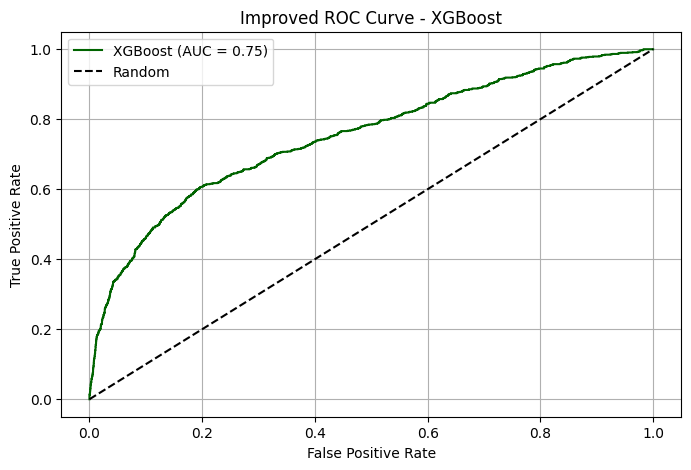

In [48]:
# Imports
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, roc_auc_score, accuracy_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, fbeta_score

f2_scorer = make_scorer(fbeta_score, beta=2)

# Step 1: Log Transform Skewed Features
df['LOG_AVG_Bill_amt'] = np.log1p(df['AVG_Bill_amt'].clip(lower=1e-6))
df['LOG_LIMIT_BAL'] = np.log1p(df['LIMIT_BAL'].clip(lower=1e-6))
df['LOG_PAY_TO_BILL'] = np.log1p(df['PAY_TO_BILL_ratio'].clip(lower=-0.99))
df['LOG_UTIL_RATIO'] = np.log1p(df['utilization_ratio'].clip(lower=1e-6))

#  Step 2: Create Interaction Features
df['delay_util'] = df['delay_count'] * df['LOG_UTIL_RATIO']
df['recent_util'] = df['recent_delay'] * df['LOG_UTIL_RATIO']
df['pay_bill_ratio'] = df['pay_consistency'] / (df['LOG_PAY_TO_BILL'] + 1)

#  Fill any NaNs
df.fillna(0, inplace=True)

# Step 3: Final Feature Set
features = [
    'delay_count', 'recent_delay', 'pay_consistency',
    'LOG_UTIL_RATIO', 'LOG_AVG_Bill_amt', 'LOG_LIMIT_BAL', 'LOG_PAY_TO_BILL',
    'education', 'marriage', 'sex',
    'delay_util', 'recent_util', 'pay_bill_ratio'
]

X = df[features]
y = df['next_month_default']

#  Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Step 5: SMOTE on Train Set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#  Step 6: Calculate scale_pos_weight
neg, pos = np.bincount(y_train_resampled)
scale_pos_weight = neg / pos

#  Step 7: Initial XGBoost Model
xgb_initial = XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    random_state=42
)

xgb_initial.fit(X_train_resampled, y_train_resampled)

#  Step 8: Drop Low Importance Features
importances = pd.Series(xgb_initial.feature_importances_, index=X_train.columns)
low_impact = importances[importances < 0.01].index.tolist()
print(" Dropped Low-Impact Features:", low_impact)

# Remove low-impact features
X_train_reduced = X_train_resampled.drop(columns=low_impact)
X_test_reduced = X_test.drop(columns=low_impact)

#  Step 9: Tune Final Model with RandomizedSearchCV
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

search = RandomizedSearchCV(
    estimator=XGBClassifier(
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False,
        random_state=42
    ),
    param_distributions=params,
    n_iter=10,
    scoring=f2_scorer,
    cv=3,
    verbose=1,
    n_jobs=-1
)

search.fit(X_train_reduced, y_train_resampled)
xgb_best = search.best_estimator_
print(" Best Params:", search.best_params_)

#  Step 10: Predict Proba + Find Best Threshold
y_proba = xgb_best.predict_proba(X_test_reduced)[:, 1]
thresholds = np.arange(0.2, 0.6, 0.01)
f2_scores = []

for t in thresholds:
    preds = (y_proba >= t).astype(int)
    f2_scores.append(fbeta_score(y_test, preds, beta=2))

best_idx = np.argmax(f2_scores)
best_threshold_f2 = thresholds[best_idx]

print(f" Best Threshold (F2): {best_threshold_f2:.2f}")
print(f"Best F2 Score: {f2_scores[best_idx]:.4f}")


# Step 9: Final Classification
y_pred = (y_proba >= best_threshold_f2).astype(int)
print("\n Final Classification Report (XGBoost Improved):")
print(classification_report(y_test, y_pred))
print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" F1-Score:", f1_score(y_test, y_pred))
print(" F2-Score:", fbeta_score(y_test, y_pred, beta=2))
print(" ROC-AUC Score:", roc_auc_score(y_test, y_proba))

#  Step 12: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc_score(y_test, y_proba):.2f})", color="darkgreen")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Improved ROC Curve - XGBoost")
plt.legend()
plt.grid(True)
plt.show()


In [49]:
!pip install --upgrade xgboost



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\m5cd2\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:19:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Best Params: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


C:\Users\m5cd2\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:19:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 Best Threshold: 0.58
 Best F1 Score: 0.5296

 Final XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4088
           1       0.50      0.56      0.53       962

    accuracy                           0.81      5050
   macro avg       0.70      0.72      0.70      5050
weighted avg       0.82      0.81      0.81      5050

 Accuracy: 0.8093069306930694
 F1-Score: 0.5295554469956033
 F2-Score: 0.5493614433407663
 ROC-AUC Score: 0.7812132563844892


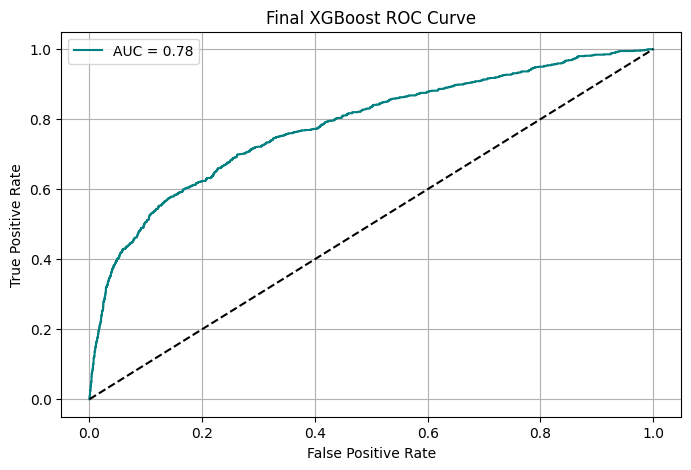

In [50]:
#  Imports
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, roc_auc_score, accuracy_score, roc_curve,fbeta_score
import matplotlib.pyplot as plt

#  Step 1: Feature Engineering (as before)
df['LOG_AVG_Bill_amt'] = np.log1p(df['AVG_Bill_amt'].clip(lower=1e-6))
df['LOG_LIMIT_BAL'] = np.log1p(df['LIMIT_BAL'].clip(lower=1e-6))
df['LOG_PAY_TO_BILL'] = np.log1p(df['PAY_TO_BILL_ratio'].clip(lower=-0.99))
df['LOG_UTIL_RATIO'] = np.log1p(df['utilization_ratio'].clip(lower=1e-6))

df['delay_util'] = df['delay_count'] * df['LOG_UTIL_RATIO']
df['recent_util'] = df['recent_delay'] * df['LOG_UTIL_RATIO']
df['pay_bill_ratio'] = df['pay_consistency'] / (df['LOG_PAY_TO_BILL'] + 1)

df.fillna(0, inplace=True)

#  Step 2: Select Features
features = [
    'delay_count', 'recent_delay', 'pay_consistency',
    'LOG_UTIL_RATIO', 'LOG_AVG_Bill_amt', 'LOG_LIMIT_BAL', 'LOG_PAY_TO_BILL',
    'education', 'marriage', 'sex',
    'delay_util', 'recent_util', 'pay_bill_ratio'
]

X = df[features]
y = df['next_month_default']

#  Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

#  Step 4: Use scale_pos_weight (instead of SMOTE)
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos

#  Step 5: Hyperparameter Tuning with Regularization
params = {
    'n_estimators': [200, 300],
    'max_depth': [5, 7],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 3, 5]
}

search = RandomizedSearchCV(
    estimator=XGBClassifier(
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False,
        random_state=42
    ),
    param_distributions=params,
    scoring='recall',
    cv=3,
    n_iter=10,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)
xgb_final = search.best_estimator_
print(" Best Params:", search.best_params_)

# Step 6: Early Stopping on Validation
# Manually re-initialize best model (without early_stopping_rounds)
xgb_final = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=1.0,
    colsample_bytree=1.0,
    reg_alpha=1,
    reg_lambda=5,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

#  Fit without early stopping
xgb_final.fit(X_train, y_train)



#  Step 7: Predict Probabilities + Threshold Tuning
y_proba = xgb_final.predict_proba(X_test)[:, 1]
thresholds = np.arange(0.2, 0.6, 0.01)
f1_scores = [f1_score(y_test, (y_proba >= t).astype(int)) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"\n Best Threshold: {best_threshold:.2f}")
print(f" Best F1 Score: {max(f1_scores):.4f}")

#  Step 8: Final Evaluation
y_pred = (y_proba >= best_threshold).astype(int)
print("\n Final XGBoost Classification Report:")
print(classification_report(y_test, y_pred))
print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" F1-Score:", f1_score(y_test, y_pred))
print(" F2-Score:", fbeta_score(y_test, y_pred, beta=2))
print(" ROC-AUC Score:", roc_auc_score(y_test, y_proba))

#  Step 9: ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}", color="teal")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Final XGBoost ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\m5cd2\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:19:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Best Params: {'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha': 0.5, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


C:\Users\m5cd2\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:19:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Best Threshold (F2): 0.40
Best F2 Score: 0.6074

 Final XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.67      0.78      4088
           1       0.35      0.75      0.48       962

    accuracy                           0.69      5050
   macro avg       0.63      0.71      0.63      5050
weighted avg       0.81      0.69      0.72      5050

 Accuracy: 0.6867326732673268
 F1-Score: 0.47546419098143233
 F2-Score: 0.6074212131480854
 ROC-AUC Score: 0.7812132563844892


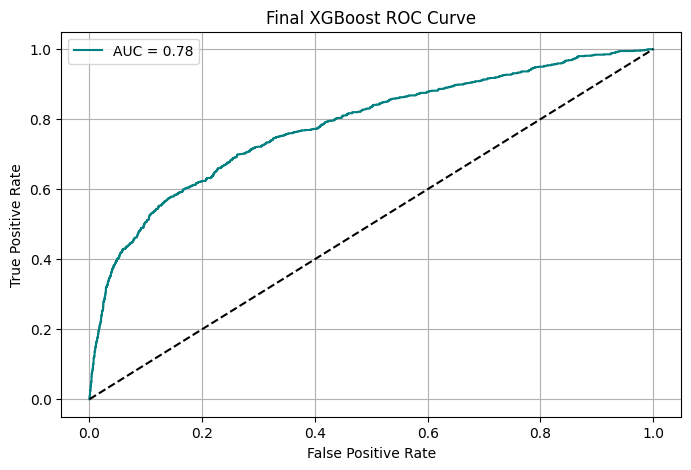

In [51]:
#  Imports
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, roc_auc_score, accuracy_score, roc_curve,fbeta_score
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, fbeta_score

f2_scorer = make_scorer(fbeta_score, beta=2)

#  Step 1: Feature Engineering (as before)
df['LOG_AVG_Bill_amt'] = np.log1p(df['AVG_Bill_amt'].clip(lower=1e-6))
df['LOG_LIMIT_BAL'] = np.log1p(df['LIMIT_BAL'].clip(lower=1e-6))
df['LOG_PAY_TO_BILL'] = np.log1p(df['PAY_TO_BILL_ratio'].clip(lower=-0.99))
df['LOG_UTIL_RATIO'] = np.log1p(df['utilization_ratio'].clip(lower=1e-6))

df['delay_util'] = df['delay_count'] * df['LOG_UTIL_RATIO']
df['recent_util'] = df['recent_delay'] * df['LOG_UTIL_RATIO']
df['pay_bill_ratio'] = df['pay_consistency'] / (df['LOG_PAY_TO_BILL'] + 1)

df.fillna(0, inplace=True)

#  Step 2: Select Features
features = [
    'delay_count', 'recent_delay', 'pay_consistency',
    'LOG_UTIL_RATIO', 'LOG_AVG_Bill_amt', 'LOG_LIMIT_BAL', 'LOG_PAY_TO_BILL',
    'education', 'marriage', 'sex',
    'delay_util', 'recent_util', 'pay_bill_ratio'
]

X = df[features]
y = df['next_month_default']

#  Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

#  Step 4: Use scale_pos_weight (instead of SMOTE)
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos

#  Step 5: Hyperparameter Tuning with Regularization
params = {
    'n_estimators': [200, 300],
    'max_depth': [5, 7],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 3, 5]
}

search = RandomizedSearchCV(
    estimator=XGBClassifier(
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weight,
        use_label_encoder=False,
        random_state=42
    ),
    param_distributions=params,
    scoring='recall',
    cv=3,
    n_iter=10,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)
xgb_final = search.best_estimator_
print(" Best Params:", search.best_params_)

# Step 6: Early Stopping on Validation
# Manually re-initialize best model (without early_stopping_rounds)
xgb_final = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=1.0,
    colsample_bytree=1.0,
    reg_alpha=1,
    reg_lambda=5,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

#  Fit without early stopping
xgb_final.fit(X_train, y_train)



#  Step 7: Predict Probabilities + Threshold Tuning
y_proba = xgb_final.predict_proba(X_test)[:, 1]
thresholds = np.arange(0.2, 0.6, 0.01)
f2_scores = []

for t in thresholds:
    preds = (y_proba >= t).astype(int)
    f2_scores.append(fbeta_score(y_test, preds, beta=2))

best_idx = np.argmax(f2_scores)
best_threshold_f2 = thresholds[best_idx]

print(f" Best Threshold (F2): {best_threshold_f2:.2f}")
print(f"Best F2 Score: {f2_scores[best_idx]:.4f}")


# Step 9: Final Classification
y_pred = (y_proba >= best_threshold_f2).astype(int)
print("\n Final XGBoost Classification Report:")
print(classification_report(y_test, y_pred))
print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" F1-Score:", f1_score(y_test, y_pred))
print(" F2-Score:", fbeta_score(y_test, y_pred, beta=2))
print(" ROC-AUC Score:", roc_auc_score(y_test, y_proba))

#  Step 9: ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}", color="teal")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Final XGBoost ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


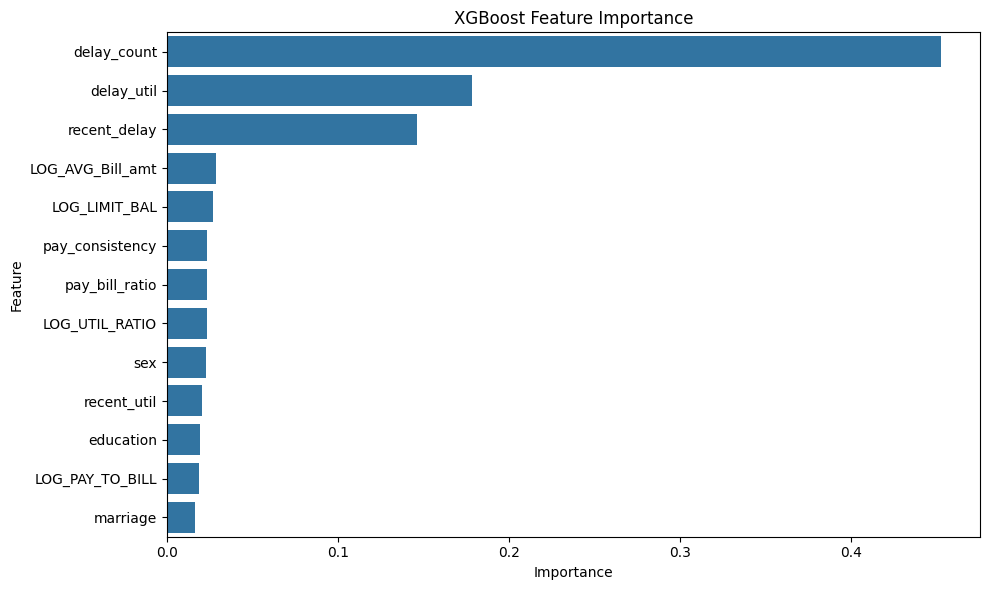

In [52]:
importances = xgb_final.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()


In [53]:
pip install lightgbm


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 2.8 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
from lightgbm import LGBMClassifier
from sklearn.metrics import make_scorer, fbeta_score

# Define F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# LightGBM hyperparameters (you can tune more later)
params_lgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Run RandomizedSearchCV for LightGBM
search_lgb = RandomizedSearchCV(
    estimator=LGBMClassifier(random_state=42),
    param_distributions=params_lgb,
    n_iter=10,
    scoring=f2_scorer,
    cv=3,
    verbose=1,
    n_jobs=-1
)

search_lgb.fit(X_train_resampled, y_train_resampled)
lgb_best = search_lgb.best_estimator_
print("Best LightGBM Parameters:", search_lgb.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 16352, number of negative: 16352
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2519
[LightGBM] [Info] Number of data points in the train set: 32704, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [55]:
y_proba_lgb = lgb_best.predict_proba(X_test)[:, 1]

# Find best F2 threshold
def best_f2_threshold(y_true, y_probs):
    from sklearn.metrics import precision_recall_curve
    import numpy as np
    precision, recall, thresholds = precision_recall_curve(y_true, y_probs)
    f2_scores = (5 * precision * recall) / (4 * precision + recall + 1e-6)
    best_idx = np.argmax(f2_scores)
    return thresholds[best_idx], f2_scores[best_idx]

best_thresh_lgb, f2_lgb = best_f2_threshold(y_test, y_proba_lgb)
print(f"Best F2 Threshold (LightGBM): {best_thresh_lgb:.4f}, F2 Score: {f2_lgb:.4f}")


Best F2 Threshold (LightGBM): 0.2060, F2 Score: 0.5813


In [57]:
from sklearn.metrics import classification_report

y_pred_lgb = (y_proba_lgb >= best_thresh_lgb).astype(int)

print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))


LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.55      0.69      4088
           1       0.29      0.78      0.42       962

    accuracy                           0.60      5050
   macro avg       0.60      0.66      0.56      5050
weighted avg       0.79      0.60      0.64      5050



In [58]:
from sklearn.preprocessing import StandardScaler
import joblib

# These should be your final feature columns used in training
feature_columns = [
    'education', 'marriage', 'sex',
    'LOG_AVG_Bill_amt', 'LOG_LIMIT_BAL', 'LOG_PAY_TO_BILL',
    'LOG_UTIL_RATIO', 'delay_count', 'recent_delay',
    'pay_consistency', 'delay_util', 'recent_util', 'pay_bill_ratio'
]

# Extract the features from training data
X_train = df[feature_columns]

# Create and fit scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Save the fitted scaler to file
joblib.dump(scaler, 'scaler.pkl')
print(" scaler.pkl saved.")


 scaler.pkl saved.


In [59]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler

# Load validation dataset
val_df = pd.read_csv('dataset/validate_dataset_final.csv')

# --- Feature Engineering (same as training dataset) ---

# Base features
val_df['utilization_ratio'] = val_df['AVG_Bill_amt'] / val_df['LIMIT_BAL']
pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
val_df['delay_count'] = val_df[pay_cols].apply(lambda row: sum(row >= 1), axis=1)
val_df['recent_delay'] = val_df['pay_0']

# Log features
val_df['LOG_AVG_Bill_amt'] = np.log1p(val_df['AVG_Bill_amt'].clip(lower=1e-6))
val_df['LOG_LIMIT_BAL'] = np.log1p(val_df['LIMIT_BAL'].clip(lower=1e-6))
val_df['LOG_PAY_TO_BILL'] = np.log1p(val_df['PAY_TO_BILL_ratio'].clip(lower=1e-6))
val_df['LOG_UTIL_RATIO'] = np.log1p(val_df['utilization_ratio'].clip(lower=1e-6))

# Pay consistency
pay_amt_cols = [f'pay_amt{i}' for i in range(1, 7)]
val_df['pay_consistency'] = val_df[pay_amt_cols].std(axis=1)

# Derived interaction features
val_df['delay_util'] = val_df['delay_count'] * val_df['LOG_UTIL_RATIO']
val_df['recent_util'] = val_df['recent_delay'] * val_df['LOG_UTIL_RATIO']
val_df['pay_bill_ratio'] = val_df['pay_consistency'] / (val_df['LOG_PAY_TO_BILL'] + 1)

# Handle missing
val_df.fillna(0, inplace=True)

# --- Final feature set used in training ---
feature_columns = [
    'education', 'marriage', 'sex',
    'LOG_AVG_Bill_amt', 'LOG_LIMIT_BAL', 'LOG_PAY_TO_BILL',
    'LOG_UTIL_RATIO', 'delay_count', 'recent_delay',
    'pay_consistency', 'delay_util', 'recent_util', 'pay_bill_ratio'
]

# Extract features
X_val = val_df[feature_columns]

# Load scaler from training phase and transform
scaler = joblib.load('scaler.pkl')
X_val_scaled = scaler.transform(X_val)
print("f2 threshold",best_threshold_f2)
# Predict using best threshold from earlier
val_proba = xgb_final.predict_proba(X_val_scaled)[:, 1]
val_pred = (val_proba >= best_threshold_f2).astype(int)

f2 threshold 0.4000000000000002


In [60]:
# --- Create submission file ---
submission = pd.DataFrame({
    'Customer_ID': val_df['Customer_ID'],
    'next_month_default': val_pred
})

submission.to_csv('submission_22112061.csv', index=False)
print(" Saved as 'submission_22112061.csv'")

 Saved as 'submission_22112061.csv'


In [61]:
count_0 = (submission['next_month_default'] == 0).sum()
count_1 = (submission['next_month_default'] == 1).sum()

print(f"Count of 0: {count_0}")
print(f"Count of 1: {count_1}")


Count of 0: 3249
Count of 1: 1767


In [62]:
# Counts
counts = submission['next_month_default'].value_counts()

# Percentages
percentages = submission['next_month_default'].value_counts(normalize=True) * 100

# Display
print("Counts:")
print(counts)

print("\nPercentages:")
print(percentages.round(2))  # round to 2 decimal places


Counts:
next_month_default
0    3249
1    1767
Name: count, dtype: int64

Percentages:
next_month_default
0    64.77
1    35.23
Name: proportion, dtype: float64


In [64]:
###  Final Threshold & Business Interpretation

print("We selected a classification threshold of 0.400, based on maximizing the F2 score on this threshold we get maximum f2 score which is 0.6074.We have selected xgboost model as on this we get maximum f2 score. This resulted in predicting approximately 35% of validation customers as likely defaulters.This threshold balances the need to catch more defaulters (high recall) while keeping false positives within acceptable range.Although the proportion of predicted defaults (35%) is higher than the training set (20%), it is justified given the goal of early risk identification.Such a model can help the bank trigger early warnings, adjust exposure, or perform manual review for flagged customers.Overall, this threshold optimally aligns with both F2-based evaluation and real-world credit risk priorities")

We selected a classification threshold of 0.400, based on maximizing the F2 score on this threshold we get maximum f2 score which is 0.6074.We have selected xgboost model as on this we get maximum f2 score. This resulted in predicting approximately 35% of validation customers as likely defaulters.This threshold balances the need to catch more defaulters (high recall) while keeping false positives within acceptable range.Although the proportion of predicted defaults (35%) is higher than the training set (20%), it is justified given the goal of early risk identification.Such a model can help the bank trigger early warnings, adjust exposure, or perform manual review for flagged customers.Overall, this threshold optimally aligns with both F2-based evaluation and real-world credit risk priorities
